Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [3]:
img = cv2.imread('..//PDI/Images/shiba.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

#cv2_imshow(img)

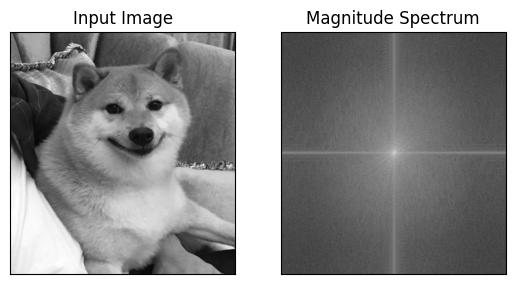

In [36]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


#mostrando a imagem de entrada
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#mostrando a magnitude da TF
cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
img = cv2.imread('..//PDI/Images/shiba.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(dft) #aplica FFT e posteriormente a desloca - dica é usar a função presente na numpy
magnitude_spectrum = 20*np.log(cv2.magnitude(fft_shift[:,:,0],fft_shift[:,:,1])) # cria o espectro de magnitude 

#caso use o colab, utilize o patch corretamente
cv2.imshow('img', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)
raio = 10 #valor inteiro que irá cortar mais ou menos frequências
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

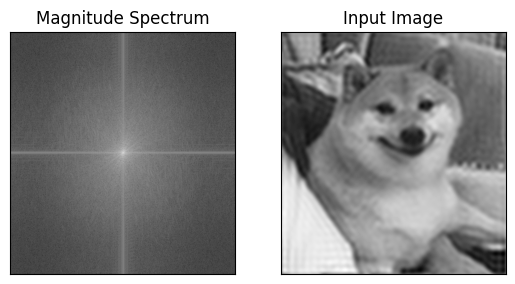

In [19]:
# apply mask and inverse DFT
fshift = fft_shift * mask # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift) # aplicar a FFT inversa - a dica é usar a presente na lib Numpy

img_back = cv2.idft(f_ishift) # aplicar a DFT - a dica é usar a presente na OpenCV
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])  # calcular a magnitude após a DFT



img_back = np.array(img_back, dtype=np.float32)
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

#caso use o colab, utilize o patch corretamente
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = 255 * (filtered_img / filtered_img.max())
filtered_img = filtered_img.astype(np.uint8)

#caso use o colab, utilize o patch corretamente
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#criação da filtro PA - segue-se o principio do PB, porém inverso
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols, 2), dtype=np.uint8)
raio = 100
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 1

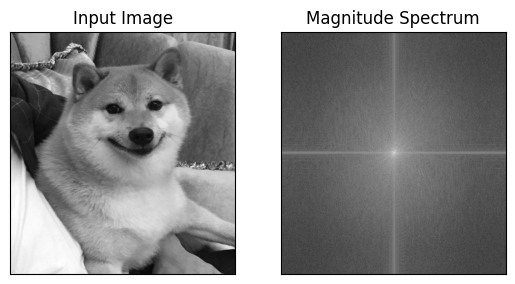

In [19]:
# apply mask and inverse DFT
fshift = fft_shift * mask # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift)  #inversa da fft
img_back = cv2.idft(f_ishift) #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv - mesmo processo anterior
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = 255 * (filtered_img / filtered_img.max())
filtered_img = filtered_img.astype(np.uint8)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central

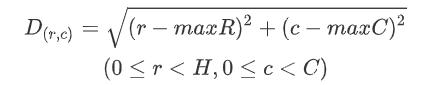

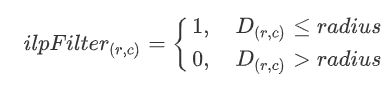

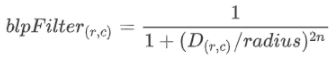

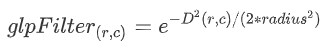

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma

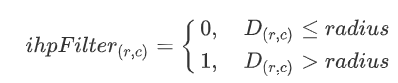

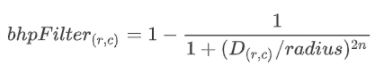

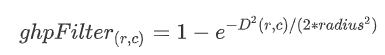

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma

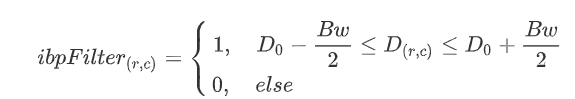

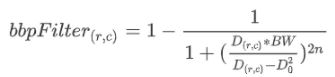

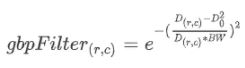

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma

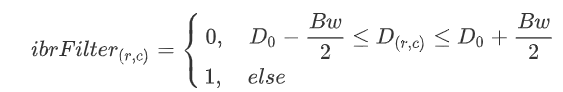

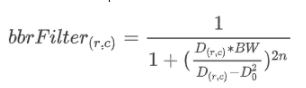

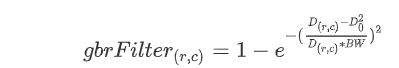

### Funções

In [5]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[-rows//2:rows//2, -cols//2:cols//2] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(r,2)+np.power(c,2)) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, dtype=np.float32)
    if lpType == 0:  # ideal low-pass filter
        lpFilter = np.copy(d)
        lpFilter[d <= radius] = 1 #selecionar a região com 1
        lpFilter[d > radius] = 0 #selecionar a região com 0
    elif lpType == 1: #Butterworth low-pass filter 
        lpFilter = 1/ (1 + np.power(d/ radius, 2 * n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian low pass filter
        lpFilter = np.exp(-np.power(d, 2) / (2 * np.power(radius, 2))) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix


def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[-rows//2:rows//2, -cols//2:cols//2] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(r, 2) + np.power(c, 2)) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal high pass filter
        lpFilter = np.copy(d)
        lpFilter[d <= radius] = 0 #selecionar a região com 0
        lpFilter[d > radius] = 1 #selecionar a região com 1
    elif lpType == 1: #Butterworth Highpass Filters 
        lpFilter = 1 - (1/(1 + np.power(d/ radius, 2 * n))) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian Highpass Filter 
        lpFilter = 1 - (np.exp(-np.power(d, 2) / (2 * np.power(radius, 2)))) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[-rows//2:rows//2, -cols//2:cols//2] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(r, 2) + np.power(c, 2))  # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal bandpass filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 1 # valor da região de passagem
        lpFilter[d >=(bandCenter - (bandWidth/2))] = 0 # selecionar e atribuir valor da região de rejeição superior
        lpFilter[d <=(bandCenter + (bandWidth/2))] = 0 # selecionar e atribuir valor da região de rejeição inferior
    elif lpType == 1: #Butterworth bandpass filter
        lpFilter = 1 - (1/(1 + np.power(d * bandWidth/(d - np.power(bandCenter, 2)), 2 * n))) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian bandpass filter
        lpFilter = np.exp(-np.power((d - np.power(bandCenter, 2))/(d * bandWidth), 2)) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix


def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[-rows//2:rows//2, -cols//2:cols//2] # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(np.power(r, 2) + np.power(c, 2)) # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal band stop filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = 0 # valor da região de passagem
        lpFilter[d >=(bandCenter - (bandWidth/2))] = 1 # selecionar e atribuir valor da região de rejeição superior
        lpFilter[d <=(bandCenter + (bandWidth/2))] = 1 # selecionar e atribuir valor da região de rejeição inferior
    elif lpType == 1: #Butterworth band stop filter
        lpFilter = 1/(1 + np.power(d * bandWidth/(d - np.power(bandCenter, 2)), 2 * n)) # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian band stop filter
        lpFilter = 1 - np.exp(-np.power((d - np.power(bandCenter, 2))/d * bandWidth, 2)) # implementar a função gerado do kernel
    lpFilter_matrix[:, :, 0] = lpFilter
    lpFilter_matrix[:, :, 1] = lpFilter
    return lpFilter_matrix

In [6]:
img = cv2.imread('../PDI/Images/shiba.jpg',0)
image_f32 = np.float32(img) # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT) #aplicar DFT - a dica é cv2.dft()
fft_shift = np.fft.fftshift(dft) #aplicar FFT e deslocamento da FFT
magnitude_spectrum = 20*np.log(cv2.magnitude(fft_shift[:,:,0],fft_shift[:,:,1])) # aplicar o calculo de spectro de magnitude - 20*log() e cv2. magnitude() utilizando DFT

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
magnitude_spectrum = np.abs(magnitude_spectrum)
magnitude_spectrum -= magnitude_spectrum.min()
magnitude_spectrum = (magnitude_spectrum * 255) / magnitude_spectrum.max()
magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
nrows, ncols = fft_shift.shape[0], fft_shift.shape[1] # pegar o tamanho da imagem np.shape da imagem no domínio da frequência - cuidado com a camada usada
real = np.power(fft_shift[:, :, 0], 2) # pegar o valor real - np.power na primeira camada
imaginary = np.power(fft_shift[:, :, 1], 2) # pegar o valor real - np.power na segunda camada
amplitude = np.sqrt(real + imaginary) # aplica a raiz quadrada entre as duas componetes do número complexo- np.sqrt()
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude) # extrais os valores extremos e posições usando o valor gerado na amplitude - cv2.minMaxLoc()

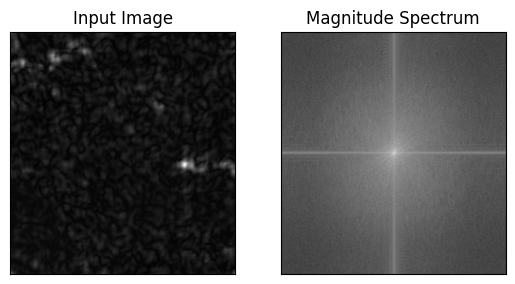

In [9]:
maskPB = createPB(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=2)

filtered_real = fft_shift[:,:,0] * maskPB[:,:,0]
filtered_imaginary = fft_shift[:,:,1] * maskPB[:,:,1]


#multiplicação da imagem no domínio da frequência pelo kernel
# filtered_freq = magnitude_spectrum * maskPB 
filtered_freq = np.dstack((filtered_real, filtered_imaginary))

#inversa da fft - cuidado com o deslocamento
f_ishift = np.fft.ifftshift(filtered_freq)

#inversa da dft - cv2.dft
img_back = cv2.idft(f_ishift)

# img_back = np.dstack(img_back[:,:,0])


#recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = (filtered_img * 255) / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




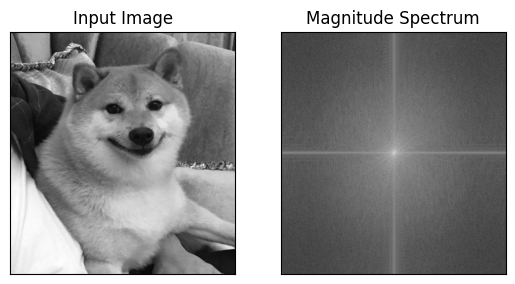

In [8]:
maskPA = createPA(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)


filtered_real = fft_shift[:,:,0] * maskPA[:,:,0]
filtered_imaginary = fft_shift[:,:,1] * maskPA[:,:,1]


#multiplicação da imagem no domínio da frequência pelo kernel
# filtered_freq = magnitude_spectrum * maskPB 
filtered_freq = np.dstack((filtered_real, filtered_imaginary))

# filtered_freq = np.multiply(magnitude_spectrum, maskPA) #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift)   #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1]) #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = (filtered_img * 255) / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('img', img)
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

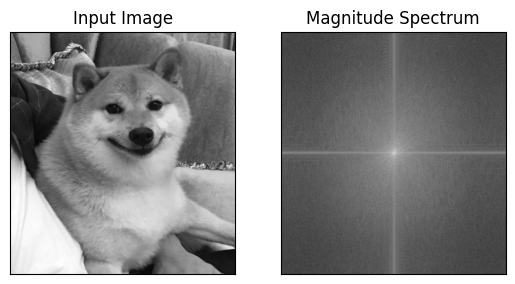

In [15]:
maskPF = createPF(fft_shift.shape, center=maxLoc, bandCenter=100, bandWidth=400, lpType=2, n=2)

#multiplicação da imagem no domínio da frequência pelo kernel 
filtered_real = fft_shift[:,:,0] * maskPF[:,:,0]
filtered_imaginary = fft_shift[:,:,1] * maskPF[:,:,1]

filtered_freq = np.dstack((filtered_real, filtered_imaginary))


f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift)   #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1]) #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img_max = filtered_img.max()
# if filtered_img_max > 0:
filtered_img = (filtered_img * 255) / filtered_img.max()
# else:
#     filtered_img = np.zeros_like(filtered_img)
filtered_img = filtered_img.astype(np.uint8)
#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

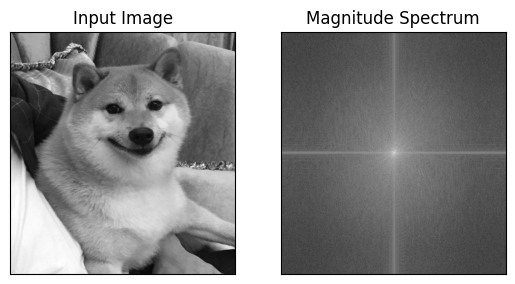

In [16]:
maskRF = createRF(fft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

#multiplicação da imagem no domínio da frequência pelo kernel 
filtered_real = fft_shift[:,:,0] * maskRF[:,:,0]
filtered_imaginary = fft_shift[:,:,1] * maskRF[:,:,1]

filtered_freq = np.dstack((filtered_real, filtered_imaginary))

f_ishift = np.fft.ifftshift(filtered_freq)  #inversa da fft - cuidado com o deslocamento
img_back = cv2.idft(f_ishift)   #inversa da dft - cv2.dft
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1]) #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = (filtered_img * 255) / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()